In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from IPython.display import display

In [47]:
#Testing with Average Daily Exceedance Flow Equation
def CCDF_aug_avg_daily_exceedance_flow(file_name):

    df = pd.read_csv(file_name + ".csv")

    df[["Year", "Month", "Day"]] = df["Datetime"].str.split("-", expand=True)

    august_data = df[df["Month"] == '08'].copy()

    sorted_data = august_data.sort_values('Mean_CFS', ascending=False)

    august_data['ranked_column_m'] = sorted_data['Mean_CFS'].rank(method='first', ascending=False)

    #august_data['row_number'] = range(1, len(august_data) + 1)
    df['numbered_col'] = range(1, len(df) + 1)

   #august_data['P_vals'] = float('nan')
    
    print("ranked column m:", august_data['ranked_column_m'].head())
    print("mean values: ", august_data['Mean_CFS'].head())
    print("????", august_data['Mean_CFS'].rank(ascending=False))

    n = len(august_data)

    df['P_Value'] = range(1, len(df) + 1)

    P = 0
    august_data['P_Value'] = (august_data['ranked_column_m'] / (n + 1)) * 100
    print(august_data['P_Value'])
    return(august_data)

    # for index, row in august_data.iterrows():
    #     P = 100 * ((row['ranked_column_m'])/(n + 1))
    #     august_data.at[index, 'P_vals'] = P

    '''
    #print(august_data)
    print(august_data['P_vals'])

    august_data.sort_values(by= ['Mean_CFS', 'P_vals'], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(august_data['P_vals'], august_data['Mean_CFS'], marker='o', linestyle='-', color='b')
    plt.xlabel('Exceedance Probability (%)')
    plt.ylabel('Mean Daily Flow (Mean_CFS)')
    plt.title('Exceedance Probability Plot for August')
    plt.grid(True)
    plt.show()

    P_value_to_find = 50
    mean_va_at_50 = np.interp(P_value_to_find, august_data['P_vals'], august_data['Mean_CFS'])

    print(mean_va_at_50)
    '''

In [48]:
CCDF_aug_avg_daily_exceedance_flow('wallstreet_aug_data')

ranked column m: 213    171.0
214    177.0
215    181.0
216    191.0
217    189.0
Name: ranked_column_m, dtype: float64
mean values:  213    220.0
214    205.0
215    196.0
216    189.0
217    190.0
Name: Mean_CFS, dtype: float64
???? 213     170.0
214     177.0
215     181.0
216     191.0
217     189.5
        ...  
2795    204.0
2796    207.0
2797    207.0
2798    197.5
2799    205.0
Name: Mean_CFS, Length: 248, dtype: float64
213     68.674699
214     71.084337
215     72.690763
216     76.706827
217     75.903614
          ...    
2795    81.927711
2796    83.534137
2797    83.132530
2798    79.116466
2799    82.329317
Name: P_Value, Length: 248, dtype: float64


,USGS,Site_No,Datetime,Mean_CFS,Cd,Year,Month,Day,ranked_column_m,P_Value
213,USGS,4174500,2008-08-01,220.0,A,2008,08,01,171.0,68.674699
214,USGS,4174500,2008-08-02,205.0,A,2008,08,02,177.0,71.084337
215,USGS,4174500,2008-08-03,196.0,A,2008,08,03,181.0,72.690763
216,USGS,4174500,2008-08-04,189.0,A,2008,08,04,191.0,76.706827
217,USGS,4174500,2008-08-05,190.0,A,2008,08,05,189.0,75.903614
...,...,...,...,...,...,...,...,...,...,...
2795,USGS,4174500,2015-08-27,176.0,A,2015,08,27,204.0,81.927711
2796,USGS,4174500,2015-08-28,171.0,A,2015,08,28,208.0,83.534137
2797,USGS,4174500,2015-08-29,171.0,A,2015,08,29,207.0,83.132530
2798,USGS,4174500,2015-08-30,180.0,A,2015,08,30,197.0,79.116466


In [49]:
#Plotting CCDF
def CCDF_plot(file_name, x, y):

    df = pd.read_csv(file_name + ".csv")

    fig, ax = plt.subplots(figsize=(16, 6))
    ax.plot(df[x], df[y], marker='o', linestyle='-')
    #plot scatter
    plt.title('CCDF of ' + file_name)
    plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
    plt.ylabel('Mean Daily Flow (cfs)')
    plt.grid(True)

    return plt.show()

In [50]:
file_name = 'wallstreet_aug_data'
CCDF_aug_avg_daily_exceedance_flow(file_name)
#CCDF_spring_storms(file_name)

Aug_data = CCDF_aug_avg_daily_exceedance_flow(file_name)

ranked column m: 213    171.0
214    177.0
215    181.0
216    191.0
217    189.0
Name: ranked_column_m, dtype: float64
mean values:  213    220.0
214    205.0
215    196.0
216    189.0
217    190.0
Name: Mean_CFS, dtype: float64
???? 213     170.0
214     177.0
215     181.0
216     191.0
217     189.5
        ...  
2795    204.0
2796    207.0
2797    207.0
2798    197.5
2799    205.0
Name: Mean_CFS, Length: 248, dtype: float64
213     68.674699
214     71.084337
215     72.690763
216     76.706827
217     75.903614
          ...    
2795    81.927711
2796    83.534137
2797    83.132530
2798    79.116466
2799    82.329317
Name: P_Value, Length: 248, dtype: float64
ranked column m: 213    171.0
214    177.0
215    181.0
216    191.0
217    189.0
Name: ranked_column_m, dtype: float64
mean values:  213    220.0
214    205.0
215    196.0
216    189.0
217    190.0
Name: Mean_CFS, dtype: float64
???? 213     170.0
214     177.0
215     181.0
216     191.0
217     189.5
        ...  
2795   

In [51]:
#CCDF_plot(Aug_data, 'P_Value', 'Mean_CFS')

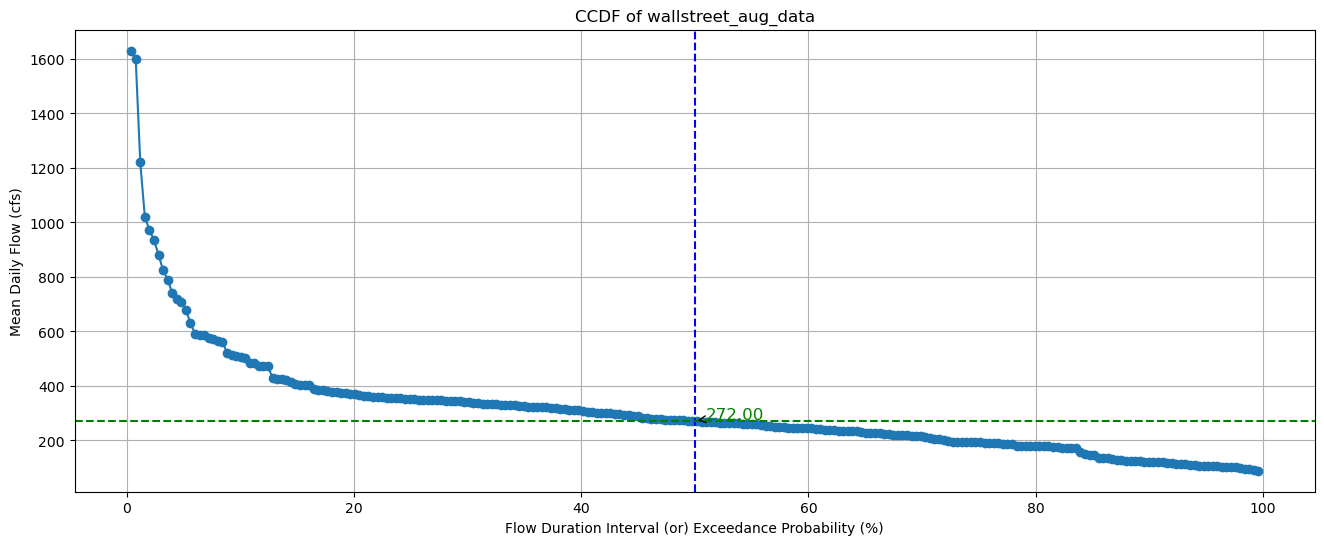

In [52]:
''' I didn't see where you saved the data frame to a file to then use to read so I made the code as not a function'''

df = Aug_data
df_sorted = df.sort_values(by='P_Value')
x = 'P_Value'
y = 'Mean_CFS'

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df_sorted[x], df_sorted[y], marker='o', linestyle='-')


# Interpolate the y-value where P_Value = 50
p_value_50 = 50
if p_value_50 in df_sorted[x].values:
    intersection_y = df_sorted[df_sorted[x] == p_value_50][y].values[0]
else:
    intersection_y = np.interp(p_value_50, df_sorted[x], df_sorted[y])

# Plot vertical line at P_Value = 50
ax.axvline(x=p_value_50, color='blue', linestyle='--')

# Add a horizontal line at the intersection point
ax.axhline(y=intersection_y, color='green', linestyle='--')

# Annotate the intersection point
ax.annotate(f'{intersection_y:.2f}', xy=(p_value_50, intersection_y), xytext=(p_value_50 + 1, intersection_y + 5),
            arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12, color='green')

# Add scatter plot for individual points
# ax.scatter(df_sorted[x], df_sorted[y], color='red')
#plot scatter
plt.title('CCDF of ' + file_name)
plt.xlabel('Flow Duration Interval (or) Exceedance Probability (%)') #P value
plt.ylabel('Mean Daily Flow (cfs)')
plt.grid(True)